<a href="https://colab.research.google.com/github/swapnil2009/PyCBC/blob/master/2_01_ScalingPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view of the property was
* Condition: An index from 1 to 5 on the condition of the apartment
* Grade: An index from 1 to 13, where 1-3 falls short of the building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design
* Sqft_above: The square footage of the interior housing space that is above ground level.
* Sqft_basement: The square footage of the interior housing space that is below ground level.
* Yr_built: The year the house was initially built
* Yr_renovated: The year of the house's last renovation
* Zipcode: What zipcode area the house is in
* Lat: Lattitude
* Long: Longitude
* Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.
* Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

### Step 1: Read and work on `kc_house_data.csv`
- Read the dataset using `pd.read_csv`
- Print the columns of the dataset
- Print the info about the dataset
- Print the description of the dataset features

In [44]:
df=pd.read_csv("kc_house_data.csv",index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
df.columns[:3]

Index(['date', 'price', 'bedrooms'], dtype='object')

### Step 2: Split the dataset into training and test sets
- Split the dataset, use `random_state=1`
- Check the shape of the train dataset and target set
- Create a scatter plot for the features vs price
- Create a box-plot for the features

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [47]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
y=df.price

In [49]:
X=df.drop(['price','date','zipcode'],axis=1)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [51]:
X.bathrooms.mean()

2.1147573219821405

In [52]:
X.bathrooms.quantile(q=0.99)

4.25

In [53]:
X_col=X.iloc[:,3]

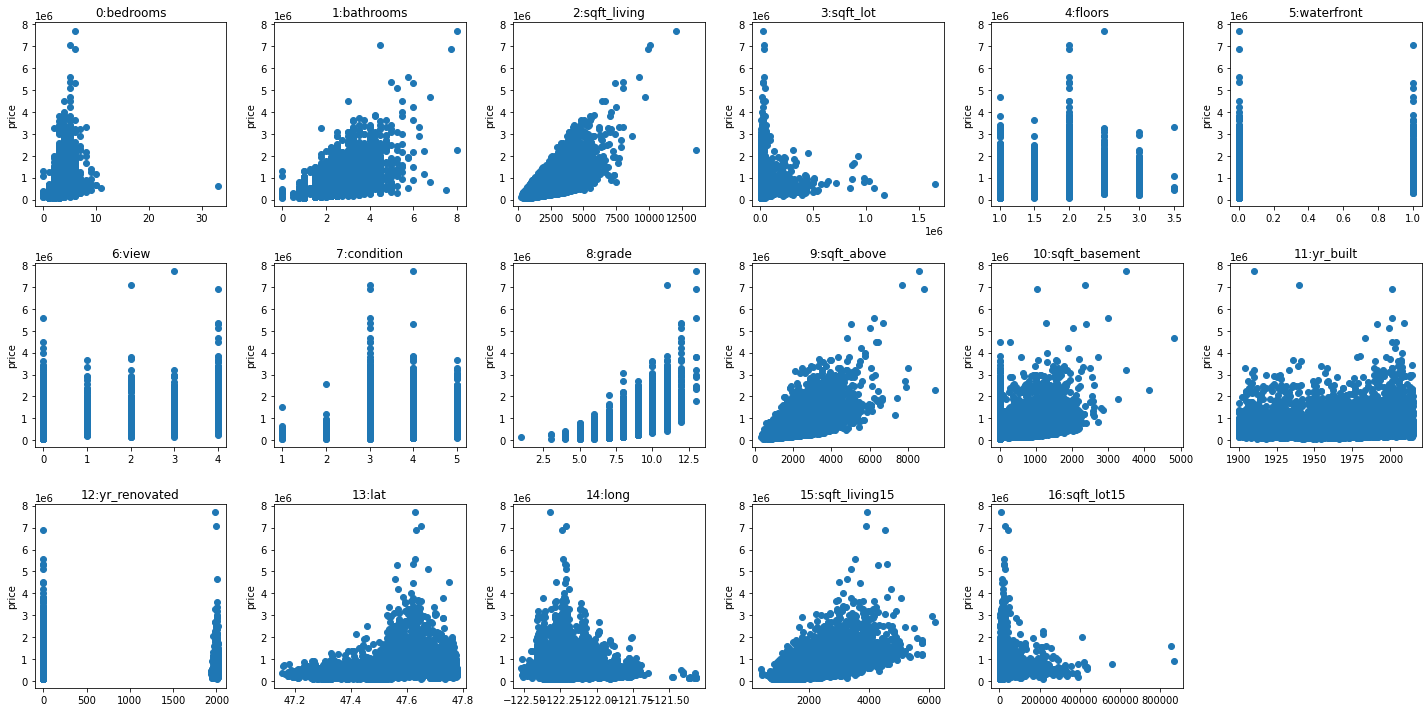

In [54]:
fig, axes = plt.subplots(3,6,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
  if i>16:
    ax.set_visible(False)
    continue
  X_col=X.iloc[:,i]
  ax.scatter( X_col,y )
  ax.set_title(f"{i}:{X.columns[i]}")
  ax.set_ylabel("price")
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


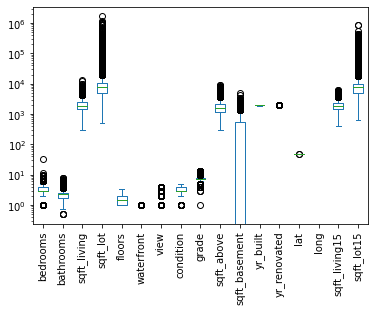

In [55]:
X.plot(kind='box', rot=90,logy=True)

In [56]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [57]:
df1=df.dropna(axis=0)

In [58]:
df1.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [59]:
 axes.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3f96611d0>,
      dtype=object)

### Step 3: Imputing
- Check the number of missing values for the columns
- Remove rows from df that contain missing values
- Remove columns from df that contain missing values
- Only drop rows where all columns are NaN
- Drop rows that have less than 3 real values
- Only drop rows where NaN appear in specific columns (here `floors`)
- Implement simpleimputer using the strategy of `mean`

In [60]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train_imp=imputer.transform(X_train)

### Step 4: Scaling
- Scale the train dataset using `StandarScaler`
- Fit the `RidgeCV()` with cross validation (cv=10) to the training dataset. Import `RidgeCV` from `sklearn.linear_model`
- Check the mean and standard deviation of the scores.
- Repeat cross validation for scaled dataset. Do you see any difference?

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_imp)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
scores_rns=cross_val_score(Ridge(),X_train,y_train,cv=10)
np.mean(scores_rns),np.std(scores_rns)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py", line 1009, in fit
    y_numeric=True,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/val

(nan, nan)

In [64]:
scores_rs=cross_val_score(Ridge(),X_train_scaled,y_train,cv=10)
np.mean(scores_rs),np.std(scores_rs)

(0.699087662727036, 0.015906261241366727)

### Step 5:
Repeat Step 5 using `KNeighborsRegressor`.

In [62]:
from sklearn.neighbors import KNeighborsRegressor

# Pipelines

### Step 1: Scaling without Pipeline
- Split the dataset into train and test datasets
- Scale the train dataset
- Fit the scaled dataset with `Ridge()`
- Scale the test dataset
- Print the score for the scaled test dataset

### Step 2: 
Repeat Step 1 using `make_pipeline`

### Step 3:
- Create a pipeline of `StandardScaler()`, `KNeighborsRegressor()`., You can use either `Pipeline` or `make_pipeline`
- Create a grid search for number of reigbors for `KNeighborsRegressor()`. Change the neighbors from 1 to 10.
- Fit the grid on the train dataset
- Print the test score.